In [119]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import os

In [12]:
os.getcwd()

'C:\\Users\\bharghava'

In [13]:
## read the training data ## import the data file ##
bike=pd.read_csv('C:\\Users\\bharghava\\day.csv')

In [14]:
#Shape of the dataset
bike.shape   #The dataset contains 731 observations and 16 attributes.##

(731, 16)

In [15]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [16]:
#Read the data ## it show first five columns of the data file 
bike.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
# Read the data ## it show the last five columns of the datafile 
bike.tail(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796
730,731,2012-12-31,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729


In [18]:
##Rename the columns for better understanding of variables
bike.rename(columns={'instant':'rec_id','dteday':'datetime','yr':'year','mnth':'month','weathersit':'weather_condition',
                       'hum':'humidity','cnt':'total_count'},inplace=True)


In [19]:
bike.head(5)

,rec_id,datetime,season,year,month,holiday,weekday,workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [28]:
#Type casting the datetime and numerical attributes to category ## important phase##

bike['datetime']=pd.to_datetime(bike.datetime)

bike['season']=bike.season.astype('category')
bike['year']=bike.year.astype('category')
bike['month']=bike.month.astype('category')
bike['holiday']=bike.holiday.astype('category')
bike['weekday']=bike.weekday.astype('category')
bike['workingday']=bike.workingday.astype('category')
bike['weather_condition']=bike.weather_condition.astype('category')

In [29]:
#Summary of the dataset
bike.describe()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [31]:
##Missing value analysis
##Missing values in dataset
bike.isnull().sum() #####No missing values present in training dataset.



rec_id               0
datetime             0
season               0
year                 0
month                0
holiday              0
weekday              0
workingday           0
weather_condition    0
temp                 0
atemp                0
humidity             0
windspeed            0
casual               0
registered           0
total_count          0
dtype: int64

Text(0.5, 1.0, 'Seasonwise monthly distribution of counts')

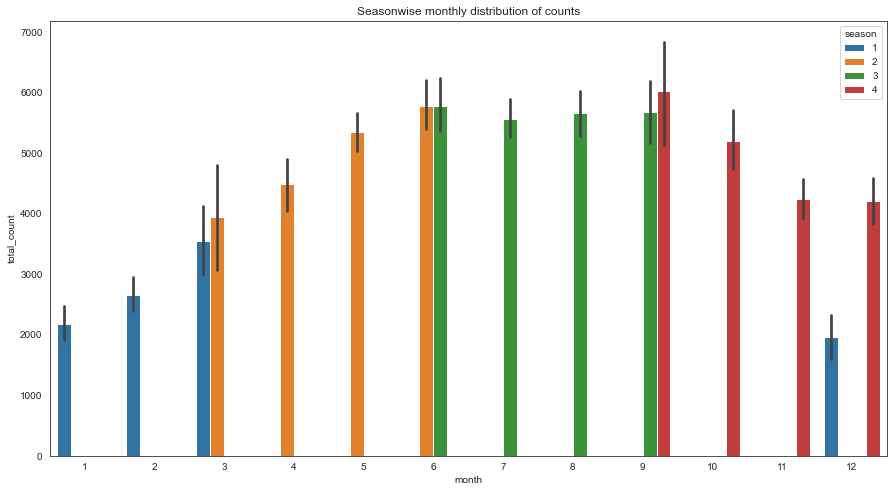

In [39]:
###Attributes distributions and trends
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')
#Bar plot for seasonwise monthly distribution of counts
sns.barplot(x='month',y='total_count',data=bike[['month','total_count','season']],hue='season',ax=ax)
ax.set_title('Seasonwise monthly distribution of counts')

Text(0.5, 1.0, 'Weekday wise monthly distribution of counts')

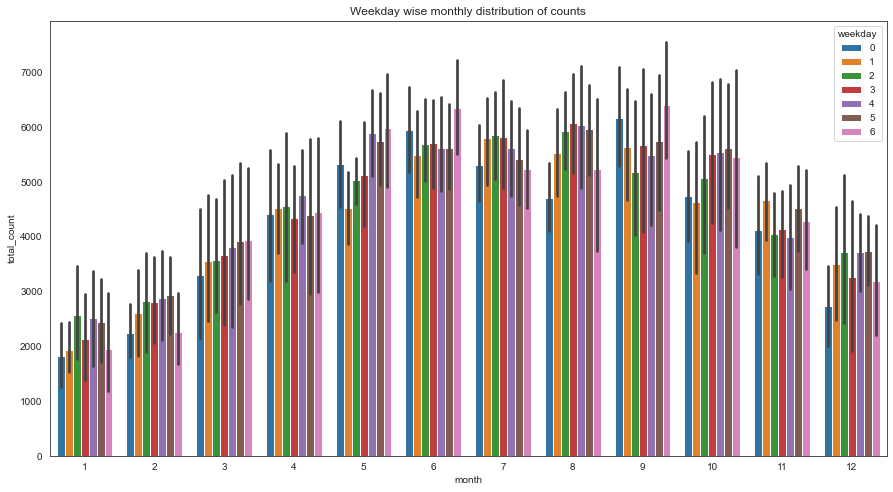

In [46]:
#Bar plot for weekday wise monthly distribution of counts
fig,ax1=plt.subplots(figsize=(15,8))
sns.barplot(x='month',y='total_count',data=bike[['month','total_count','weekday']],hue='weekday',ax=ax1)
ax1.set_title('Weekday wise monthly distribution of counts')

In [ ]:
##From the above plots, we can observed that increasing the bike rental count in 
#springe and summer season and then decreasing the bike rental count in fall and winter season.
##Here,season 1-> spring season 2 -> summer season 3 -> fall season 4 -> winter

Text(0.5, 1.0, 'Yearly distribution of count')

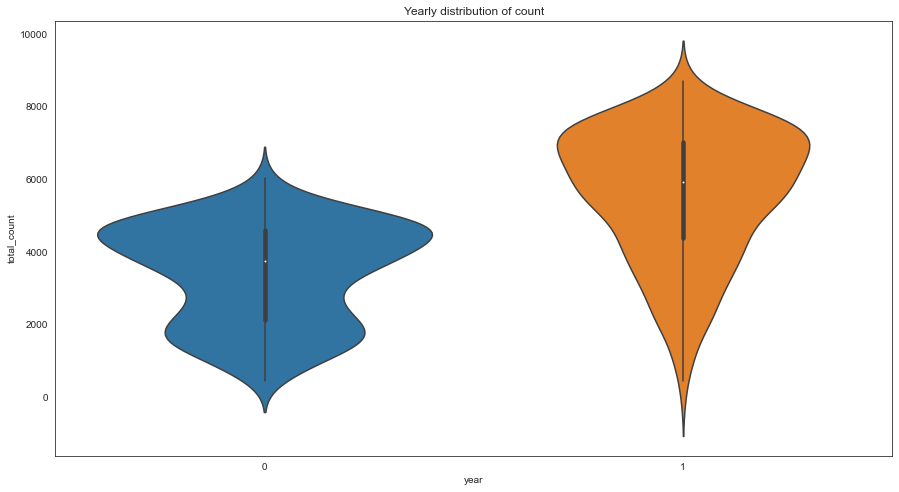

In [53]:
##Yearly wise distribution of counts

fig,ax=plt.subplots(figsize=(15,8))
#Violin plot for yearly distribution of counts
sns.violinplot(x='year',y='total_count',data=bike[['year','total_count']])
ax.set_title('Yearly distribution of count')

In [ ]:
##From the violin plot, we can observed that the bike rental count distribution is highest in year 2012 then in year 2011.
##Here,year 0-> 2011, year 1-> 2012

Text(0.5, 1.0, 'Holiday wise distribution of counts')

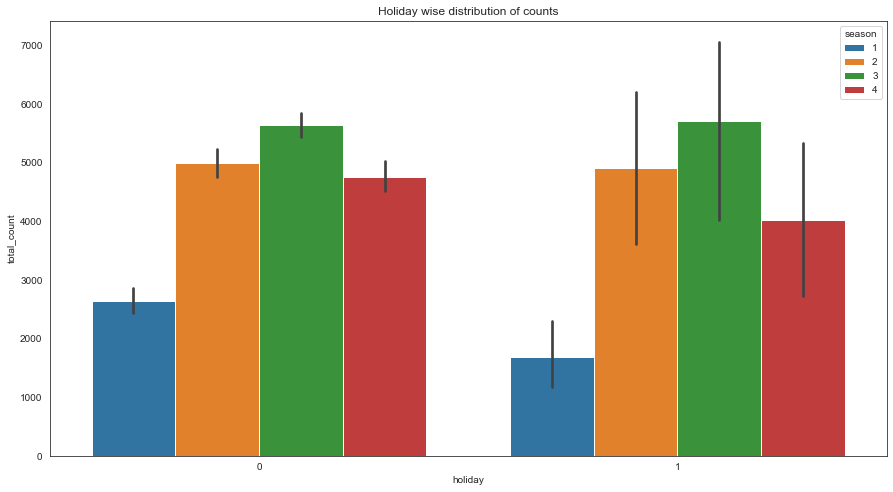

In [56]:
##Holiday wise distribution of counts

fig,ax=plt.subplots(figsize=(15,8))
#Barplot for Holiday distribution of counts
sns.barplot(data=bike,x='holiday',y='total_count',hue='season')
ax.set_title('Holiday wise distribution of counts')

In [ ]:
##From the above bar plot, we can observed that
##during no holiday the bike rental counts is highest compared to during holiday for different seasons.
###Here, 0->No holiday, 1-> holiday

Text(0.5, 1.0, 'Workingday wise distribution of counts')

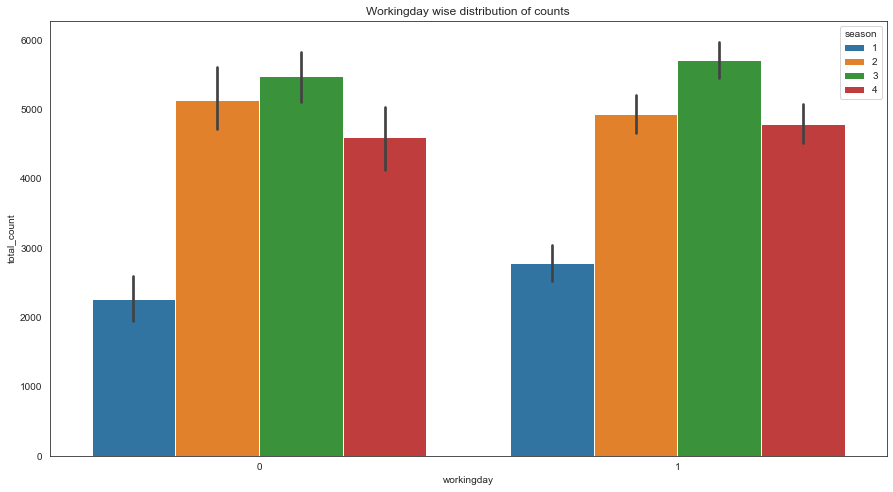

In [59]:
##Workingday wise distribution of counts
fig,ax=plt.subplots(figsize=(15,8))
#Bar plot for workingday distribution of counts
sns.barplot(data=bike,x='workingday',y='total_count',hue='season')
ax.set_title('Workingday wise distribution of counts')

In [ ]:
##From the above bar plot, we can observed that during
##workingday the bike rental counts is quite highest compared to during no workingday for different seasons.
##Here, 0-> No workingday, 1-> workingday

Text(0.5, 1.0, 'Weather_condition wise monthly distribution of counts')

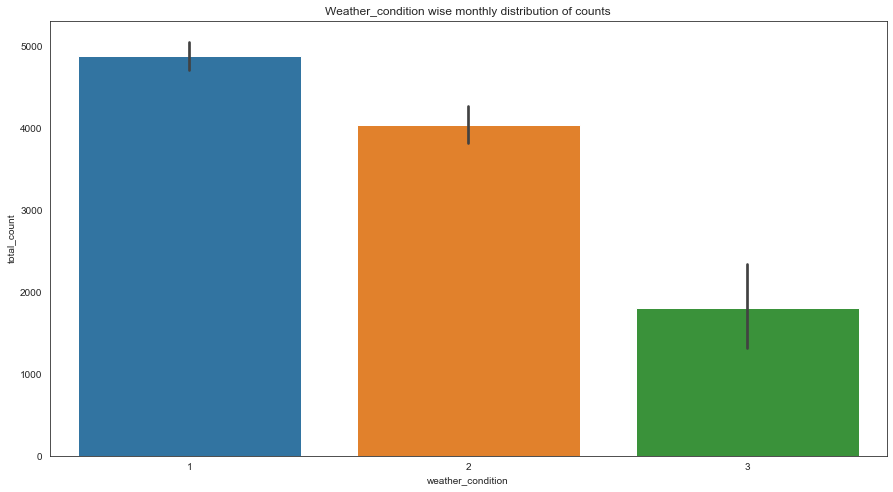

In [62]:
fig,ax1=plt.subplots(figsize=(15,8))
#Bar plot for weather_condition distribution of counts
sns.barplot(x='weather_condition',y='total_count',data=bike[['month','total_count','weather_condition']],ax=ax1)
ax1.set_title('Weather_condition wise monthly distribution of counts')

In [ ]:
###From the above bar plot, we can observed that 
##during clear,partly cloudy weather the bike rental count is highest and 
##the second highest is during mist cloudy weather and followed by third highest during light snow and light rain weather.

Text(0.5, 1.0, 'total_count outliers')

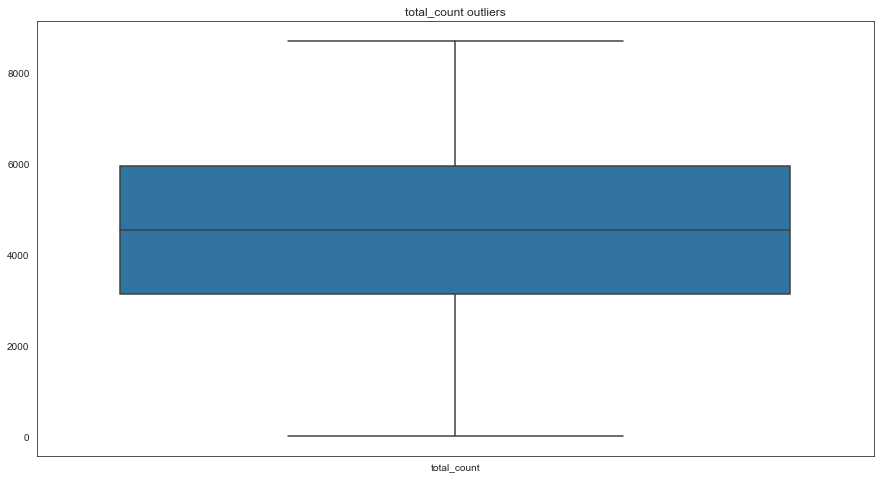

In [65]:
##Outlier analysis
###Total_Count_Outliers
fig,ax=plt.subplots(figsize=(15,8))
#Boxplot for total_count outliers
sns.boxplot(data=bike[['total_count']])
ax.set_title('total_count outliers')

In [ ]:
###From the box plot, we can observed that no outliers are present in total_count variable.

Text(0.5, 1.0, 'Temp_windspeed_humidity_outiers')

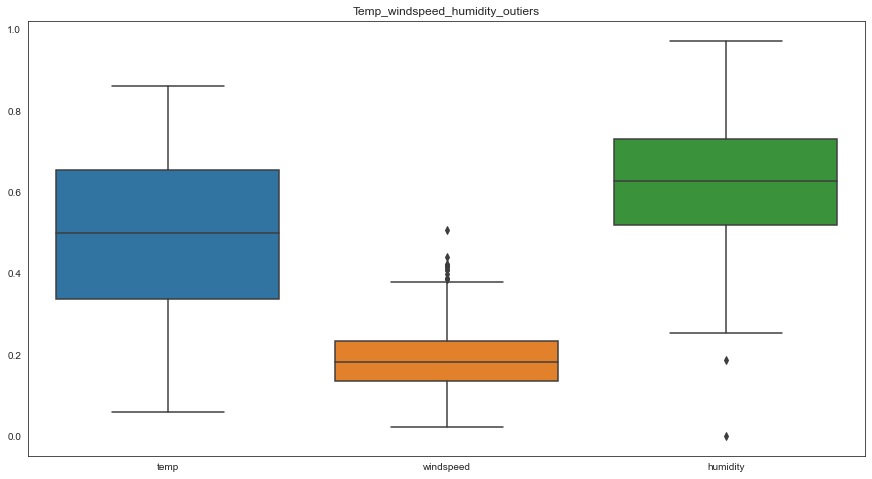

In [68]:
##Temp_windspeed_humidity_outliers
fig,ax=plt.subplots(figsize=(15,8))
#Box plot for Temp_windspeed_humidity_outliers
sns.boxplot(data=bike[['temp','windspeed','humidity']])
ax.set_title('Temp_windspeed_humidity_outiers')

((array([-3.10612952, -2.83371839, -2.68121219, -2.57340905, -2.48915191,
         -2.41955673, -2.36001798, -2.30782877, -2.26125818, -2.21912992,
         -2.18060696, -2.14507173, -2.11205508, -2.08119197, -2.05219258,
         -2.0248228 , -1.99889075, -1.97423711, -1.95072808, -1.92825019,
         -1.90670633, -1.88601273, -1.8660966 , -1.84689427, -1.82834975,
         -1.81041348, -1.79304141, -1.77619419, -1.75983653, -1.74393663,
         -1.72846577, -1.71339788, -1.69870925, -1.68437825, -1.67038506,
         -1.6567115 , -1.64334086, -1.63025771, -1.6174478 , -1.60489794,
         -1.59259587, -1.58053022, -1.56869036, -1.55706641, -1.54564912,
         -1.53442983, -1.52340042, -1.51255328, -1.50188124, -1.49137757,
         -1.4810359 , -1.47085025, -1.46081495, -1.45092464, -1.44117426,
         -1.431559  , -1.4220743 , -1.41271583, -1.40347947, -1.39436132,
         -1.38535765, -1.3764649 , -1.36767969, -1.35899879, -1.35041911,
         -1.3419377 , -1.33355173, -1.

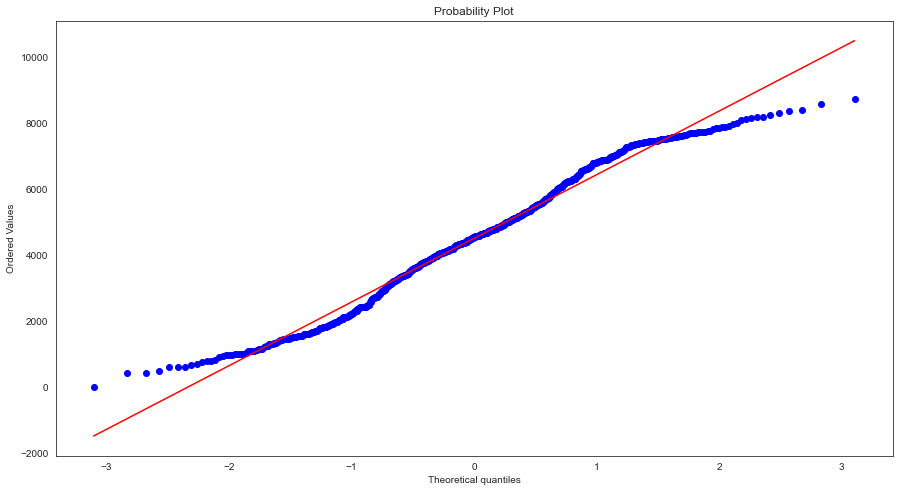

In [79]:
##Normal probability plot is a graphical technique to identify substantive departures
##from normality and also it tells about goodness of fit.
import scipy
from scipy import stats
import matplotlib.pyplot as plt
#Normal plot
fig=plt.figure(figsize=(15,8))
stats.probplot(bike.total_count.tolist(),dist='norm',plot=plt)

In [ ]:
##The above probability plot, the some target variable data points are deviates from normality.
    

In [ ]:
## why we are using Correlation matrix
##Correlation matrix is tells about linear relationship between attributes and help us to build better models.

Text(0.5, 1.0, 'Correlation matrix of attributes')

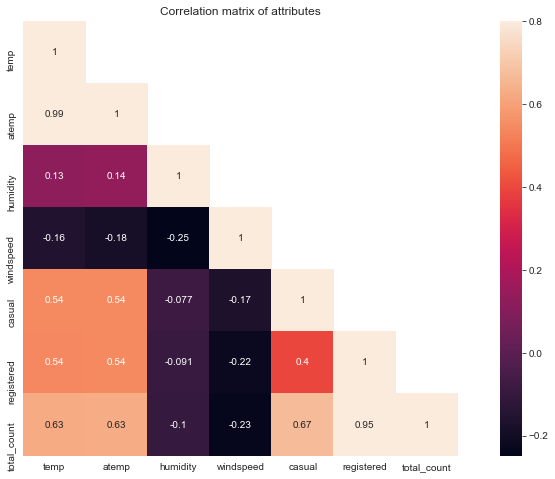

In [85]:
#Create the correlation matrix
correMtr=bike[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask=np.array(correMtr)
mask[np.tril_indices_from(mask)]=False
#Heat map for correlation matrix of attributes
fig,ax=plt.subplots(figsize=(15,8))
sns.heatmap(correMtr,mask=mask,vmax=0.8,square=True,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')

In [ ]:
##From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other.
##The temp and atemp are highly positively correlated to each other, 
##it means that both are carrying same information.The total_count,
##casual and registered are highly positively correlated to each other. 
##So, we are going to ignore atemp,casual and registered variable for further analysis.



In [304]:
bike.corr()

,rec_id,temp,atemp,humidity,windspeed,casual,registered,total_count
rec_id,1.000000,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
temp,0.150580,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.152638,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
humidity,0.016375,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.112620,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.275255,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.659623,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
total_count,0.628830,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


In [305]:
## trained the data set
X = bike[['rec_id', 'temp', 'atemp', 'humidity', 'windspeed', 'casual','registered']]
Y = bike['total_count']

In [336]:
## splitting the datafile
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=70)

In [337]:
## TO fitting the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [338]:
#Model Evaluation
print(lm.intercept_)


1.8189894035458565e-12


In [340]:
coeff_bike = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_bike

,Coefficient
rec_id,1.708103e-15
temp,1.763440e-12
atemp,2.309489e-12
humidity,-1.637796e-12
windspeed,-1.594035e-12
casual,1.000000e+00
registered,1.000000e+00


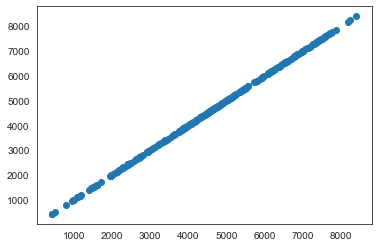

In [342]:
##Predictions from our Model
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

<AxesSubplot:xlabel='total_count', ylabel='Density'>

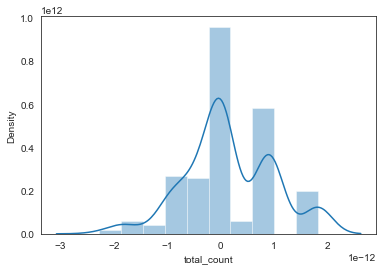

In [343]:
sns.distplot(y_test-predictions)

In [344]:
##evaluate model
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.043250844758259e-13
MSE: 7.161186465091185e-25
RMSE: 8.462379372901681e-13
